## Ativ prática 4 - CNN
The project's focus is on building a Convolutional Neural Network (CNN) model to classify images of cats and dogs.
The dataset used is Catsdogs from kaggle
* https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

 - The aim is to construct a CNN and evaluate its configuration with different layers, including varying the size of the kernels, the pooling size, and the dropout rate between layers.
1) We evaluated experiments with different CNN configurations, testing various combinations of kernel sizes, pooling sizes, dropout rates, and dense layers.
2) The experiments are detailed with code snippets showing the implementation in Python using Keras, TensorFlow and pyplot libraries.
3) The results of each experiment are analyzed in terms of training loss, validation loss, training accuracy, and validation accuracy. It helps identifying signs of overfitting and improve the model's ability to generalize new data.
4) We conclude with observations on the impact of different parameters on the model's performance, such as kernel size, pool size, dropout rate, and the number of dense layers.



In [1]:
#!pip install tensorflow

In [2]:
#!pip install "numpy<1.25.0"

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
path = 'cnd'

In [6]:
objTrain = ImageDataGenerator(rescale = 1./255)

objTest = ImageDataGenerator(rescale = 1./255)

input_shape = (150,150,3)

dados_train = objTrain.flow_from_directory(path+'/train',
                                                           target_size = (150, 150),
                                                           batch_size = 32,
                                                           class_mode = 'binary')
dados_test = objTest.flow_from_directory(path+'/test',
                                               target_size = (150, 150),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [7]:
def func_cnn(num_conv_layers, num_filters, kernel_size, pool_size, dropout_rate, num_dense_layers):
    cnn = Sequential()
    
    for i in range(num_conv_layers):
        cnn.add(Conv2D(num_filters[i], kernel_size, input_shape=input_shape, activation='relu'))
        cnn.add(MaxPooling2D(pool_size))
        cnn.add(Dropout(dropout_rate))
    
    cnn.add(Flatten())
    for i in range(num_dense_layers):
        cnn.add(Dense(128, activation='relu'))
        cnn.add(Dropout(dropout_rate))
        
    cnn.add(Dense(1, activation='sigmoid'))
    cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    saida = cnn.fit(dados_train, steps_per_epoch = 557 / 32, epochs = 10, validation_data = dados_test, validation_steps = 140 / 32)
    # Gráfico para visualizar os erros e accuracy
#evolução do erro, azul
    plt.plot(saida.history['accuracy'], label="Training accuracy")
#performance da rede
    plt.plot(saida.history['val_accuracy'], label="Validation accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [8]:
#cnn = Sequential()
#cnn.add(Conv2D(128, (3,3), input_shape = (150, 150, 3), activation = 'relu'))
#cnn.add(MaxPooling2D(pool_size = (2,2)))
#cnn.add(Conv2D(64, (3,3), input_shape = (150, 150, 3), activation = 'relu'))
#cnn.add(MaxPooling2D(pool_size = (2,2)))
#cnn.add(Conv2D(32, (3,3), input_shape = (150, 150, 3), activation = 'relu'))
#cnn.add(MaxPooling2D(pool_size = (2,2)))
#
#
#cnn.add(Flatten())
#
#cnn.add(Dense(units = 128, activation = 'relu'))
#cnn.add(Dropout(0.2))
#cnn.add(Dense(units = 1, activation = 'sigmoid'))

# Visualização da estrutura da rede neural
#cnn.summary()

- ``Conv2D``: This is a convolutional layer that applies a number of filters (128) to the input image to create a feature map. The additional ``Conv2D`` layers continue the process of feature extraction and dimensionality reduction. The second ``Conv2D`` layer has 64 filters and the third 32. Each is followed by a ``MaxPooling2D`` layer that further reduces the dimensions.
- ``Flatten Layer``: This converts the 3D feature maps to 1D feature vectors.
- ``Dense Layer``: This are neural network where the first Dense layer has 128 neurons and is followed by the activation function ReLU. This layer is what enables the network to learn complex patterns in the data.
- ``Dropout Layer``: This is a regularization technique used to prevent overfitting. (ex: 0.2 drop 20% of the data).
- ``Output``: The final layer is another Dense layer with a single neuron because the network is designed for a binary classification task. The output of this layer will give the probability of the input belonging to one of the two classes 0 or 1 (cat or dog).


In summary this describes a **Convolutional Neural Network (CNN)** model, structured using a sequential approach.

Epoch 1/10
17/17 [==============================] - 16s 857ms/step - loss: 0.7161 - accuracy: 0.5117 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/10
17/17 [==============================] - 14s 823ms/step - loss: 0.6964 - accuracy: 0.5027 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/10
17/17 [==============================] - 14s 848ms/step - loss: 0.6930 - accuracy: 0.5117 - val_loss: 0.6918 - val_accuracy: 0.5500
Epoch 4/10
17/17 [==============================] - 14s 819ms/step - loss: 0.6909 - accuracy: 0.5350 - val_loss: 0.6909 - val_accuracy: 0.5429
Epoch 5/10
17/17 [==============================] - 15s 820ms/step - loss: 0.6931 - accuracy: 0.5494 - val_loss: 0.6916 - val_accuracy: 0.4929
Epoch 6/10
17/17 [==============================] - 14s 826ms/step - loss: 0.6882 - accuracy: 0.5422 - val_loss: 0.6843 - val_accuracy: 0.5429
Epoch 7/10
17/17 [==============================] - 15s 830ms/step - loss: 0.6513 - accuracy: 0.6104 - val_loss: 0.6888 - val_accuracy: 0.6286

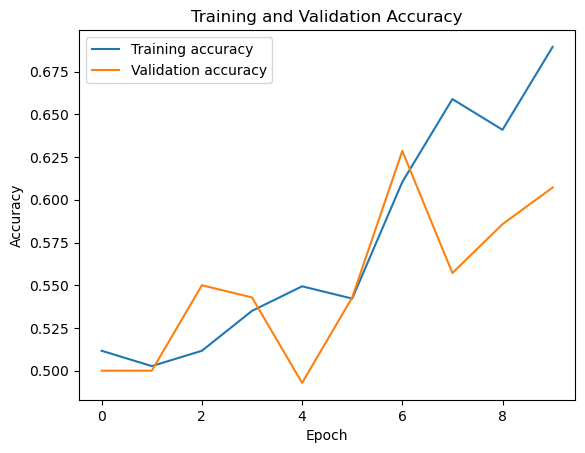

In [11]:
func_cnn(
    num_conv_layers=3,
    num_filters=[128, 64, 32],
    kernel_size=(3, 3),
    pool_size=(2, 2),
    dropout_rate=0.2,
    num_dense_layers=1
)

- **Training Loss**: It started at 0.7161 and consistently decreased to 0.6106 by the end of the 10th epoch. This indicates that the model is learning and improving in fitting the training data.
- **Validation Loss**: It fluctuates across epochs, initially decreasing but then increasing, especially in epoch 9 to 10. This suggest the model is starting to ``overfit`` the training data. Overfitting occurs when a model learns the training data too well making it less effective on new data (validation).
- **Training Accuracy**: It improved from 51% to 69%, showing the model is becoming better at classifying the training data.
- **Validation accuracy**: As we see on graph, the gap between training and validation accuracy, along with the fluctuating **validation loss**, again suggests overfitting.

Epoch 1/10
17/17 [==============================] - 11s 584ms/step - loss: 0.7114 - accuracy: 0.4740 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
17/17 [==============================] - 10s 540ms/step - loss: 0.6941 - accuracy: 0.4901 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
17/17 [==============================] - 10s 543ms/step - loss: 0.6918 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
17/17 [==============================] - 10s 555ms/step - loss: 0.6942 - accuracy: 0.5206 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
17/17 [==============================] - 9s 537ms/step - loss: 0.6958 - accuracy: 0.4955 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/10
17/17 [==============================] - 10s 542ms/step - loss: 0.6944 - accuracy: 0.4614 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
17/17 [==============================] - 9s 533ms/step - loss: 0.6941 - accuracy: 0.4919 - val_loss: 0.6931 - val_accuracy: 0.5000
E

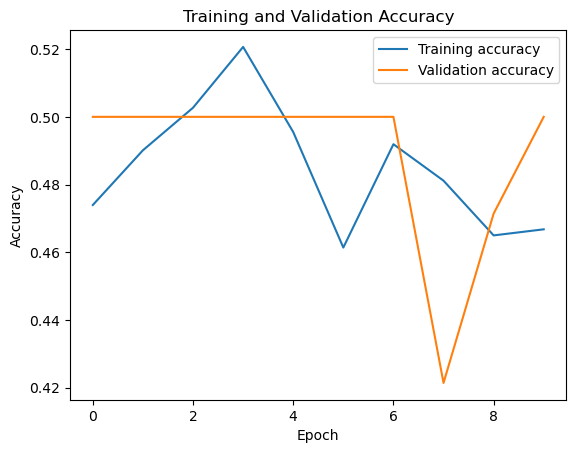

In [13]:
func_cnn(
    num_conv_layers=3,
    num_filters=[128, 64, 32],
    kernel_size=(4, 4),
    pool_size=(4, 4),
    dropout_rate=0.3,
    num_dense_layers=2
)

- **Training Loss**: It started at 0.7114 and decreased to 0.6946 by the end of the 10th epoch. This indicates that the model is not learning fast and improving in fitting the training data. It doesn't decrease significantly.
- **Validation Loss**: It fluctuates across epochs. This suggest the model is starting to ``overfit`` the training data. Overfitting occurs when a model learns the training data too well making it less effective on new data (validation).
- **Training Accuracy**: It fluctuates across epochs, showing the model is not becoming better at classifying the training data.
- **Validation accuracy**: As we see on graph, the validation accuracy in the model is consistently around 50%.

Epoch 1/10
17/17 [==============================] - 13s 716ms/step - loss: 0.7184 - accuracy: 0.5189 - val_loss: 0.6927 - val_accuracy: 0.5143
Epoch 2/10
17/17 [==============================] - 12s 682ms/step - loss: 0.6880 - accuracy: 0.5476 - val_loss: 0.6925 - val_accuracy: 0.5214
Epoch 3/10
17/17 [==============================] - 12s 680ms/step - loss: 0.6798 - accuracy: 0.5530 - val_loss: 0.7042 - val_accuracy: 0.4929
Epoch 4/10
17/17 [==============================] - 12s 672ms/step - loss: 0.6820 - accuracy: 0.5853 - val_loss: 0.6870 - val_accuracy: 0.5786
Epoch 5/10
17/17 [==============================] - 12s 686ms/step - loss: 0.6482 - accuracy: 0.6248 - val_loss: 0.6700 - val_accuracy: 0.5786
Epoch 6/10
17/17 [==============================] - 12s 693ms/step - loss: 0.6364 - accuracy: 0.6248 - val_loss: 0.6722 - val_accuracy: 0.5857
Epoch 7/10
17/17 [==============================] - 12s 685ms/step - loss: 0.6054 - accuracy: 0.6571 - val_loss: 0.7049 - val_accuracy: 0.6286

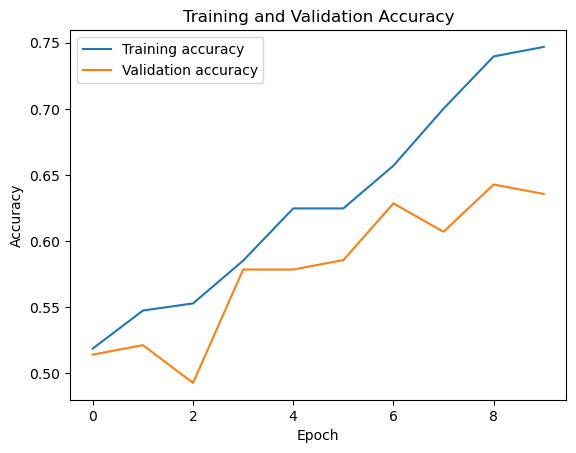

In [14]:
func_cnn(
    num_conv_layers=3,
    num_filters=[128, 64, 32],
    kernel_size=(2, 2),
    pool_size=(2, 2),
    dropout_rate=0.1,
    num_dense_layers=1
)

- **Training Loss**: It started at 0.7184 and consistently decreased to 0.4796 by the end of the 10th epoch. This indicates that the model is learning and improving in fitting the training data.
- **Validation Loss**: It fluctuates across epochs, initially decreasing but then increasing. This suggest the model is starting to ``overfit`` the training data. Overfitting occurs when a model learns the training data too well making it less effective on new data (validation).
- **Training Accuracy**: It improved from 51% to 74%, showing the model is becoming better at classifying the training data.
- **Validation accuracy**: As we see on graph, the gap between training and validation accuracy, along with the fluctuating **validation loss**, again suggests overfitting.

# Conclusion
- The model shows signs of overfitting, as evidenced by the gap between training and validation accuracy. To solve it we could get more training data. But the goal here is not just to achieve high training accuracy, but to build a model that generalizes well to new (validation) data.
- So monitoring the learning curves for both loss and accuracy is crucial. When overfitting happens (the **validation loss** starts increasing, or the **validation accuracy** stops improving or decreases). It means that our method isn't working perfectly and we might change the approach. This could mean getting more varied practice tests (more or different data) or changing the model structure.
- **Increasing kernel_size** to (4, 4) leaded to a lower accuracy because larger kernels will capture more information from the input image and it may lead to a loss of finer details in the image as they cover a larger area.
- **Increasing pool_size** to (4, 4) A larger pooling size will downsample the input feature maps more aggressively. It means that each max pooling operation will retain less spatial information, potentially leading to a loss of smaller features.
- **dropout_rate**: Increasing the dropout rate to 0.3 means that 30% of the neurons will be randomly dropped out. This could improve generalization by making the network less sensitive to the specific features of the training data.
- Increasing **num_dense_layers** to 2: More Dense layers can increase the model's capacity to learn complex patterns. However, it also increases the number of parameters in the model, which can lead to a higher risk of overfitting, especially if our training data is not large enough.